# Machine learning

Question: 1

Imagine you have a dataset where you have different Instagram features like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is to predict the number of likes and Time Since posted and the rest of the features are your input features. Now you have to build a model which can predict the number of likes and Time Since posted. 
Dataset This is the Dataset You can use this dataset for this question. 



In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("instagram_reach.csv")
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [26]:
data.shape

(100, 6)

In [3]:
data.drop(['Unnamed: 0', 'S.No'], axis=1, inplace=True)

In [4]:
data.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            94 non-null     object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    object
 5   Likes              100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [27]:
data.isnull().sum()

USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [28]:
data.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

# EDA

<Axes: xlabel='Followers', ylabel='Density'>

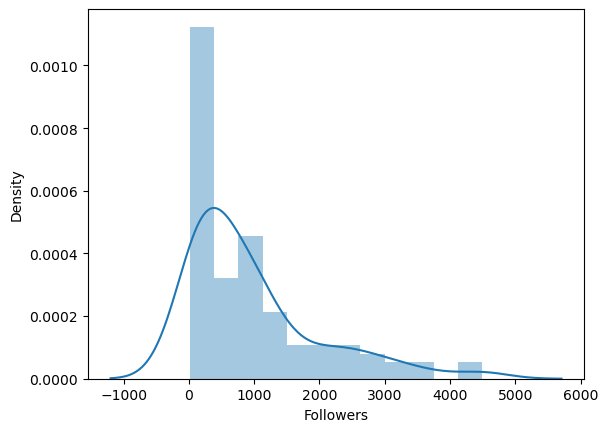

In [30]:
sns.distplot(data['Followers'])

<Axes: xlabel='Likes', ylabel='Density'>

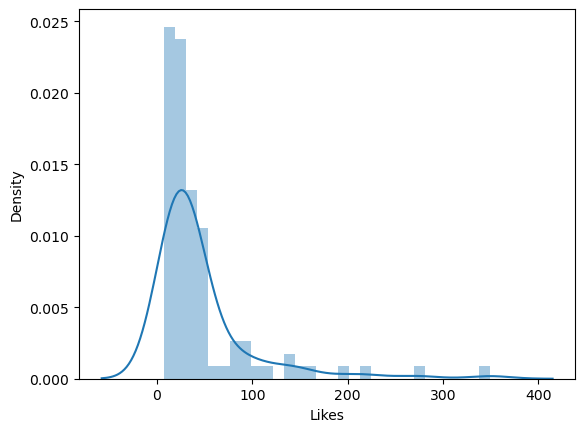

In [31]:
sns.distplot(data['Likes'])

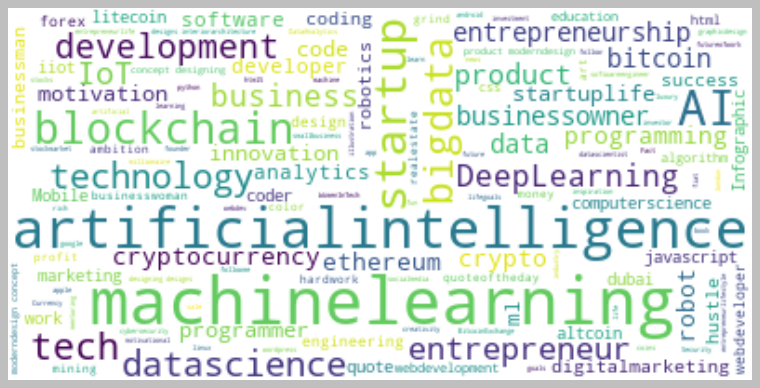

In [32]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

C:\Users\02rup\AppData\Local\Temp\ipykernel_1900\1933276655.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cbar = False, annot = True, fmt=".1f")


<Axes: >

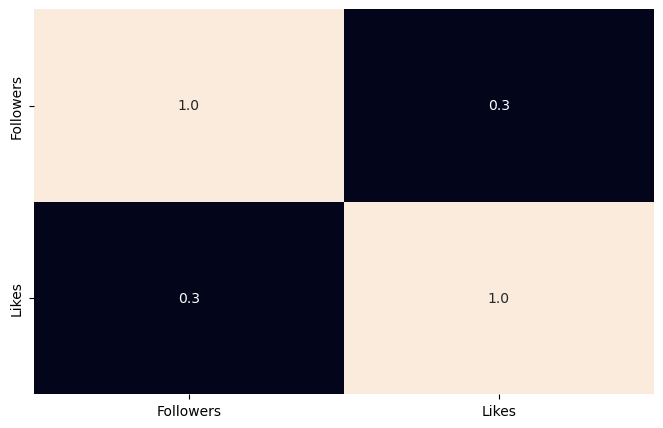

In [6]:
plt.figure(figsize = (8,5))
sns.heatmap(data.corr(), cbar = False, annot = True, fmt=".1f")

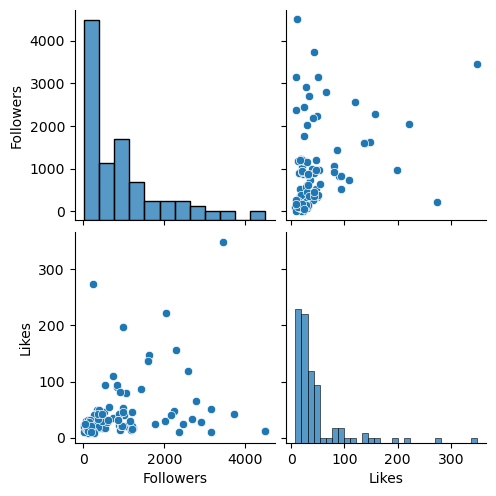

In [7]:
sns.pairplot(data)
plt.show()

In [8]:
data['Time since posted'] = data['Time since posted'].map(lambda a: int(re.sub('hours', '', a)))

<Axes: xlabel='Time since posted', ylabel='Likes'>

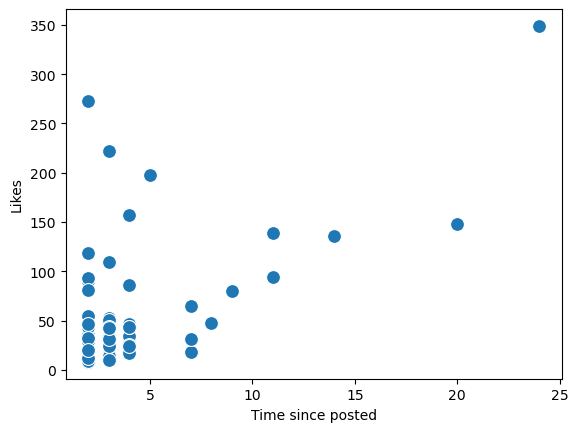

In [9]:
sns.scatterplot(x=data['Time since posted'], y=data['Likes'], marker='o', s=100)

In [10]:
X = data[['Followers']]

In [11]:
y = data[['Time since posted', 'Likes']]

In [12]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [13]:
X = preprocessor.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
X_train

array([[ 2.4625478 ],
       [ 0.19418749],
       [-0.69037397],
       [-0.68244957],
       [ 0.04065219],
       [ 0.00895458],
       [-0.69730783],
       [-0.50712216],
       [-0.50712216],
       [-0.00689423],
       [ 1.25803857],
       [ 2.15646774],
       [ 1.4789313 ],
       [-0.67650627],
       [-0.7755613 ],
       [ 0.26649767],
       [-0.80329671],
       [ 1.04209859],
       [ 0.20409299],
       [-0.67056297],
       [-0.02670524],
       [-0.72900544],
       [ 0.46658884],
       [-0.3446719 ],
       [ 0.64984065],
       [ 1.71270118],
       [-0.0732611 ],
       [ 0.24668666],
       [-0.38132226],
       [-0.42490648],
       [-0.78843846],
       [-0.6160827 ],
       [-0.43778363],
       [-0.7616936 ],
       [-0.93999266],
       [-0.70919443],
       [-0.69631728],
       [-0.86471084],
       [-0.12576027],
       [ 0.2318284 ],
       [-0.42787813],
       [-0.21887201],
       [ 1.80581291],
       [-0.04750679],
       [ 0.79644211],
       [ 1

In [18]:
y_train

,Time since posted,Likes
55,24,349
88,2,29
26,2,25
42,2,41
69,2,40
...,...,...
60,2,16
71,2,50
14,3,28
92,2,12


In [33]:
def printPredictions(y_true,y_pred, count):
    print(f"Predictions: ")
    print(y_true.assign(
        Y1_pred = y_pred[:,0],
        Y2_pred = y_pred[:,1]   
    ).head(count).to_markdown(index = False))

In [20]:
def showResults(y_true, y_pred, count = 5):
    print("R2 score: ",r2_score(y_true,y_pred))
    print("Mean squared error: ",mean_squared_error(y_true,y_pred))
    print("Mean absolute error: ",mean_absolute_error(y_true,y_pred))
    printPredictions(y_true,y_pred, count)

# Training the model

# Linear Regression

In [21]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = linear.predict(X_test)

In [23]:
showResults(y_test, y_pred)

R2 score:  0.0911591539510791
Mean squared error:  600.1910747056276
Mean absolute error:  13.883912964499743
Predictions: 
|   Time since posted |   Likes |   Y1_pred |   Y2_pred |
|--------------------:|--------:|----------:|----------:|
|                   3 |      14 |   2.58546 |   34.9026 |
|                   4 |      24 |   2.58228 |   34.8494 |
|                   2 |      21 |   3.46532 |   49.6558 |
|                   2 |      31 |   2.61005 |   35.315  |
|                   2 |      16 |   2.60688 |   35.2618 |


# Random Forest Regressor

In [24]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
showResults(y_test,rf_model.predict(X_test))

R2 score:  0.6668038365155123
Mean squared error:  193.9976797361111
Mean absolute error:  7.782466666666666
Predictions: 
|   Time since posted |   Likes |   Y1_pred |   Y2_pred |
|--------------------:|--------:|----------:|----------:|
|                   3 |      14 |      2.04 |     15.66 |
|                   4 |      24 |      2.04 |     15.66 |
|                   2 |      21 |      2.03 |     23.78 |
|                   2 |      31 |      2    |     19.8  |
|                   2 |      16 |      2    |     19.8  |


# R2 score is 66.68 %